# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
# Define a dictionary with the data structured for easy access.
feature = {
    "age": "age in years",
    "sex": {
        "description": "sex",
        "values": {1: "male", 0: "female"}
    },
    "cp": {
        "description": "chest pain type",
        "values": {
            0: "Typical angina: chest pain related to decreased blood supply to the heart",
            1: "Atypical angina: chest pain not related to heart",
            2: "Non-anginal pain: typically esophageal spasms (non-heart related)",
            3: "Asymptomatic: chest pain not showing signs of disease"
        }
    },
    "trestbps": "resting blood pressure (in mm Hg on admission to the hospital); anything above 130-140 is typically cause for concern",
    "chol": {
        "description": "serum cholesterol in mg/dl",
        "details": "serum = LDL + HDL + 0.2 * triglycerides; above 200 is cause for concern"
    },
    "fbs": {
        "description": "fasting blood sugar > 120 mg/dl",
        "values": {1: "true", 0: "false"},
        "note": "'>126' mg/dL signals diabetes"
    },
    "restecg": {
        "description": "resting electrocardiographic results",
        "values": {
            0: "Nothing to note",
            1: "ST-T Wave abnormality (can range from mild to severe, signals non-normal heartbeat)",
            2: "Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)"
        }
    },
    "thalach": "maximum heart rate achieved",
    "exang": {
        "description": "exercise induced angina",
        "values": {1: "yes", 0: "no"}
    },
    "oldpeak": "ST depression induced by exercise relative to rest; looks at stress of heart during exercise (unhealthy heart will stress more)",
    "slope": {
        "description": "the slope of the peak exercise ST segment",
        "values": {
            0: "Upsloping: better heart rate with exercise (uncommon)",
            1: "Flatsloping: minimal change (typical healthy heart)",
            2: "Downsloping: signs of unhealthy heart"
        }
    },
    "ca": "number of major vessels (0-3) colored by fluoroscopy; more blood movement indicates no clots",
    "thal": {
        "description": "thalium stress result",
        "values": {
            1: "normal",
            3: "normal",
            6: "fixed defect: used to be defect but okay now",
            7: "reversible defect: no proper blood movement during exercise"
        }
    },
    "target": {
        "description": "have disease or not",
        "values": {1: "yes", 0: "no"}
    }
}

# Example of how to access each feature, such as feature['age'] or feature['cp']['description']



In [3]:
# Define the function
def fea(col_name):
    print(f"Column: {col_name}")
    
    # Print the main content
    print("Details:", feature.get(col_name))
    
    # Check if feature[col_name] is a dictionary before accessing keys
    if isinstance(feature[col_name], dict):
        # Print description if available
        if "description" in feature[col_name]:
            print("Description:", feature[col_name]["description"])
        
        # Print values if available
        if "values" in feature[col_name]:
            print("Values:", feature[col_name]["values"])

# Example usage
fea("cp")  # Works because "cp" has "description" and "values"
fea("age") # Works without error even if "age" does not have "description" or "values"


Column: cp
Details: {'description': 'chest pain type', 'values': {0: 'Typical angina: chest pain related to decreased blood supply to the heart', 1: 'Atypical angina: chest pain not related to heart', 2: 'Non-anginal pain: typically esophageal spasms (non-heart related)', 3: 'Asymptomatic: chest pain not showing signs of disease'}}
Description: chest pain type
Values: {0: 'Typical angina: chest pain related to decreased blood supply to the heart', 1: 'Atypical angina: chest pain not related to heart', 2: 'Non-anginal pain: typically esophageal spasms (non-heart related)', 3: 'Asymptomatic: chest pain not showing signs of disease'}
Column: age
Details: age in years


## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manupulation

In [4]:
# Import all the toold we need

# Regular EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline


# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)
The goal here is to find more about the data and become a subject matter export on the dataset you are working on

1. What question are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outlier and why should you care about them?
5. How can you add, change or remove features to het more out of the data?


In [7]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Find out how many of each class there
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

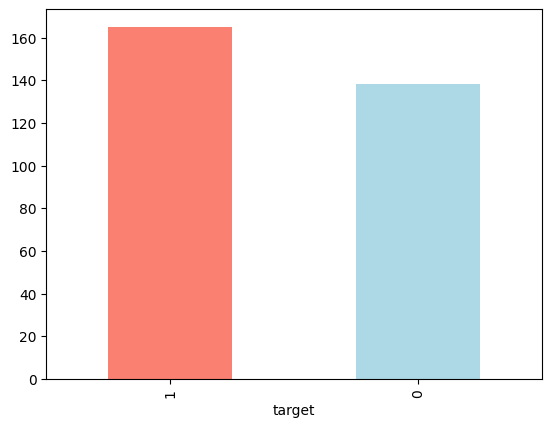

In [9]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


### Heart Disesae Frequency Frequency accoding to sex

In [15]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
# Compare target columns with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [17]:
93/207

0.4492753623188406

In [18]:
72/96

0.75

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

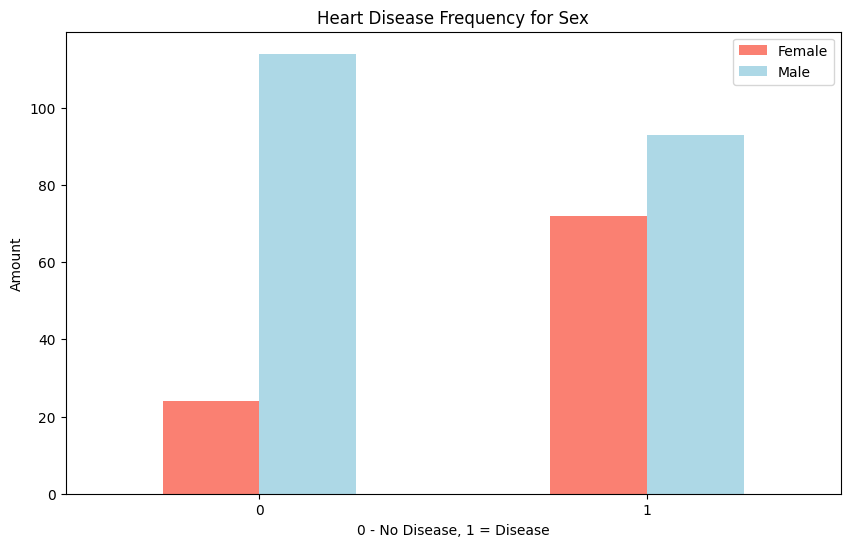

In [19]:
# Creat a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 - No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)


## Age vs Max Heart Rate for Heart Disease

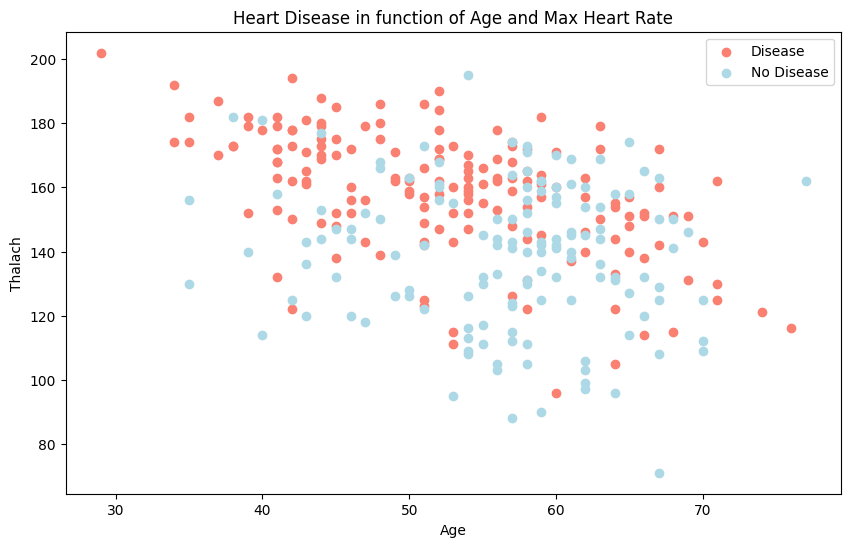

In [20]:
# Create another figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")

# Scatter with negative examples 
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue")

# Add some features
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease","No Disease"])

<Axes: ylabel='Frequency'>

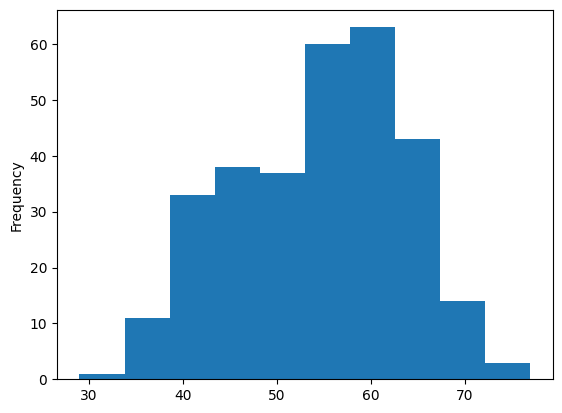

In [21]:
# Check distribution of Age

df.age.plot.hist()

### Heart Disesae Frequency per Chest Pain Type

In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

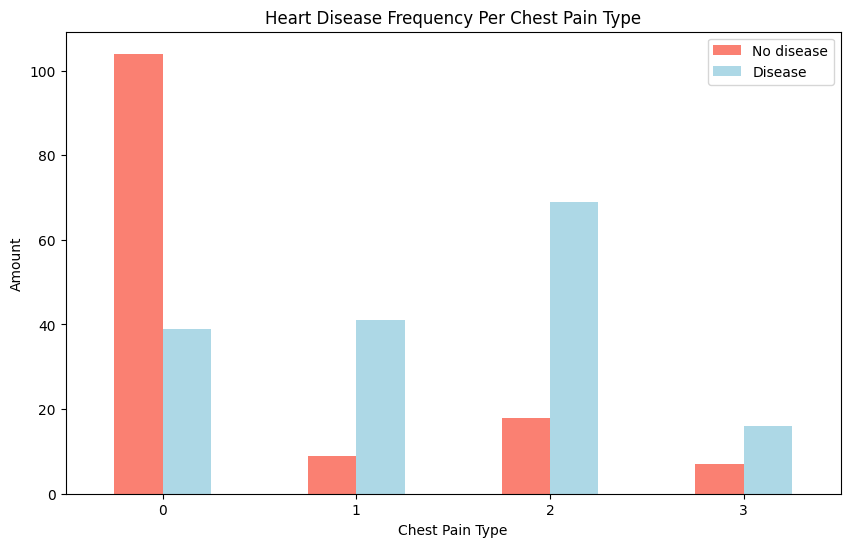

In [23]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                  figsize = (10, 6),
                                  color = ["salmon", "lightblue"])

# Features
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation = 0)

In [24]:
corr = df.corr()

In [25]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


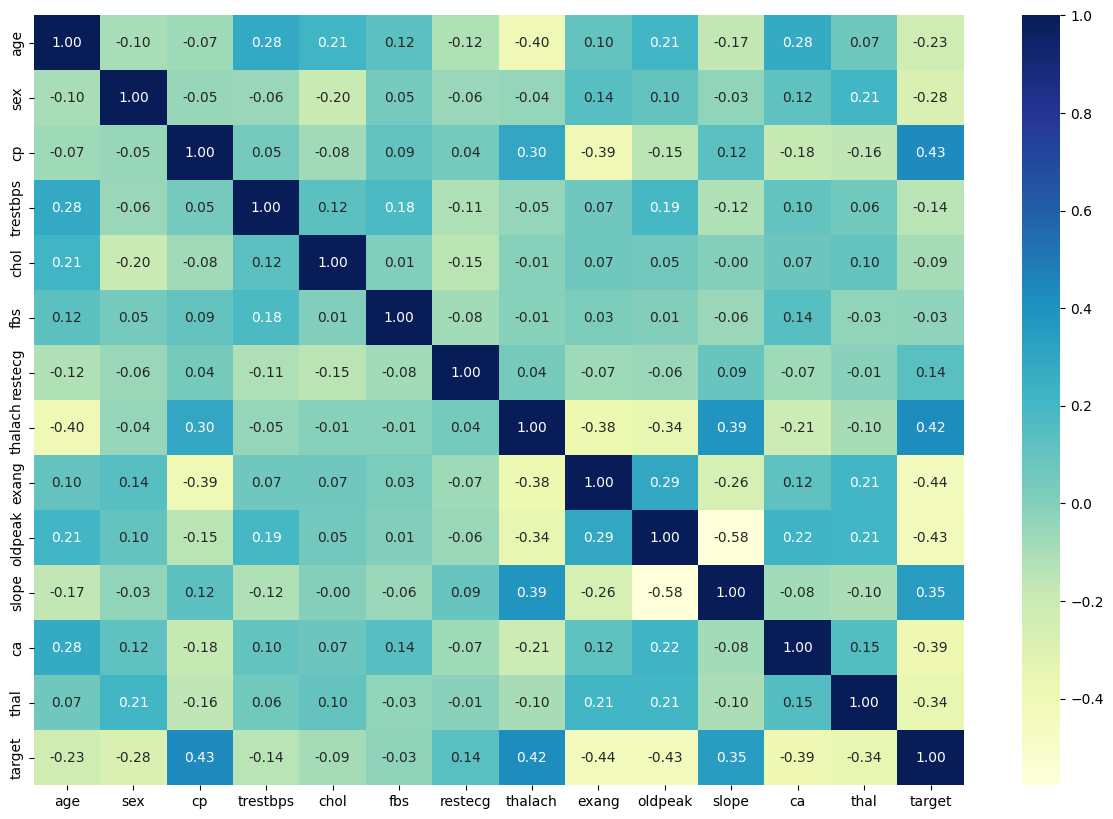

In [26]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))

ax = sns.heatmap(corr_matrix,
                annot=True,
                fmt = ".2f",
                cmap = "YlGnBu")

# Negative Correlation - a relatiom netween two variables in which on increases as the other decreases
# Positive Correlation - one increases as the other increases

## 5. Modelling

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Split data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# Splitting into training and testing
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [29]:
len(X_train), len(X_test)

(242, 61)

* We're ready with split data (train, test).
* Now time for building machine learning model

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classfier

In [30]:
# Put models in a dictinory
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a funcitno to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: A dict of differnt scikit-learn ml models
    X_train: training data(no lables)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

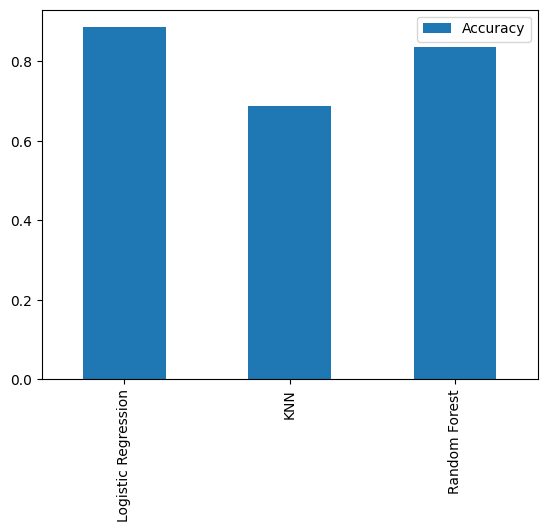

In [32]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar()

We had made our baseline model but we know first prediction aren't always what we should based on, So what we should do?

Let's look at the followings:
* Hyperparameter tuning
* Feature importance

* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

### Hyperparameter tuning

In [33]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
KNN = KNeighborsClassifier()

# Loop through different n_neighbords

for i in neighbors:
    KNN.set_params(n_neighbors = i)

    # Fit the algorithm
    KNN.fit(X_train, y_train)

    # Update the trianing score list
    train_scores.append(KNN.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(KNN.score(X_test,y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


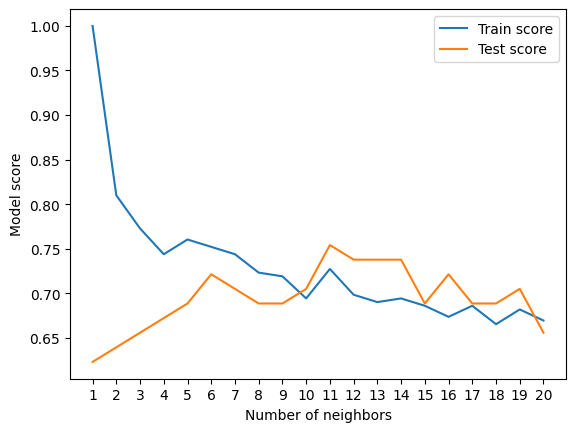

In [35]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogistivRegression()
* RandomForestClassifier()

... using RandomizedCV

In [36]:
# Create a hyperparameter grif for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [37]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegressoin
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
# Setup the random seed
np.random.seed(42)

# Setup random hyperparameter seach for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
# Evaluate the randomized seach RandomForestClssifier  model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning using GridSearchCV

Since our LogisticRegression model provides best model so far, we'll try and improve then again using GridSearchCV

In [43]:
# Differeent hyperparametres for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ['liblinear']}

# Setup grid hyperparameter search for our LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

# Fit the grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
# Evaluate the grid seach LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
import sklearn
sklearn.__version__

'1.5.0'

## Evaluating our tune machine learning machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matirx
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation waas used where possible

To make comparisons and evaluat our trained model, first we need to make redictions

In [47]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

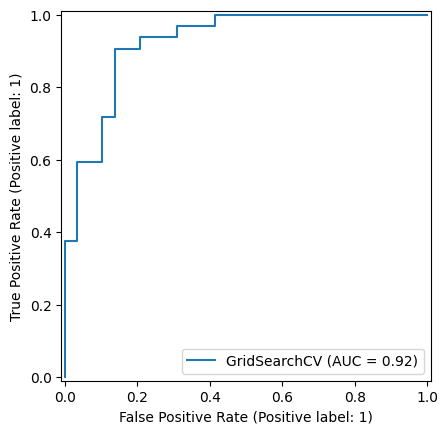

In [49]:
# Available in Scikit-Learn version 1.2+
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [50]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


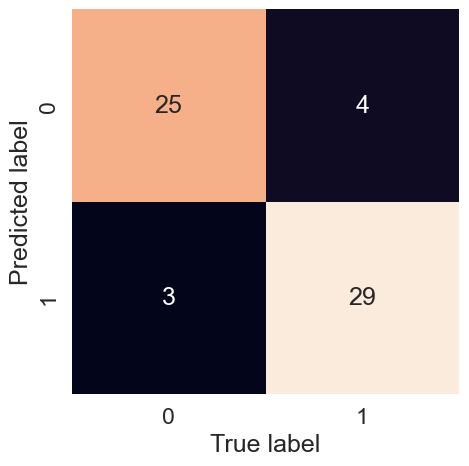

In [51]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale = 1.5)
    fig, ax = plt.subplots(figsize = (5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

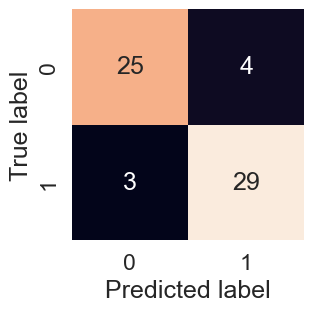

In [52]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)


> Now we've got ROC curve, AUC metric and a confuction matrix.
> Let's get a classification report as well as cross-validation, recall and f1-score 

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evalution metrics using cross validation
We're going to calculate, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [54]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# Create a new classifier with beat parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver= 'liblinear')

In [56]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [57]:
cv_acc_m = np.mean(cv_acc)
cv_acc_m

0.8479781420765027

In [58]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [59]:
cv_precision_m = np.mean(cv_precision)
cv_precision_m

0.8215873015873015

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [61]:
cv_recall_m = np.mean(cv_recall)
cv_recall_m

0.9272727272727274

In [62]:
# Cross-validated f2-score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [63]:
cv_f1_m = np.mean(cv_f1)
cv_f1_m

0.8705403543192143

<Axes: title={'center': 'Cross-validated classification metrics'}>

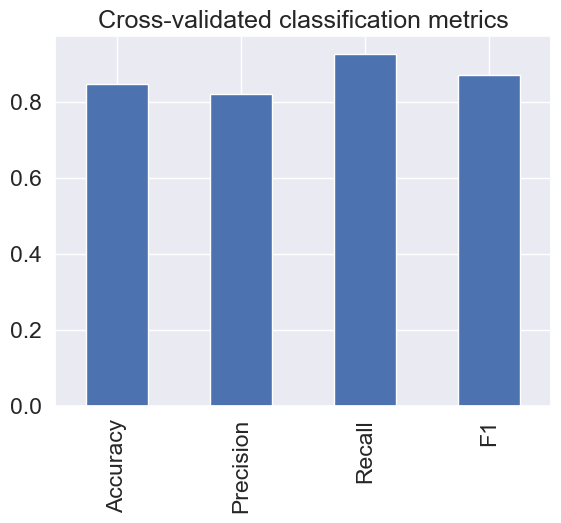

In [64]:
# visulize cross-validation metircs 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_m,
                          "Precision": cv_precision_m,
                          "Recall": cv_recall_m,
                          "F1": cv_f1_m},
                         index = [0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                     legend = False)

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to seach for "(MODEL NAME) feature importance"

Let's find the feature importtance for our LogisticRegression model...

In [65]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.20433597178569418,
                         solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [66]:
# Check coef
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [67]:
# Mathc coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<Axes: title={'center': 'Feature Importance'}>

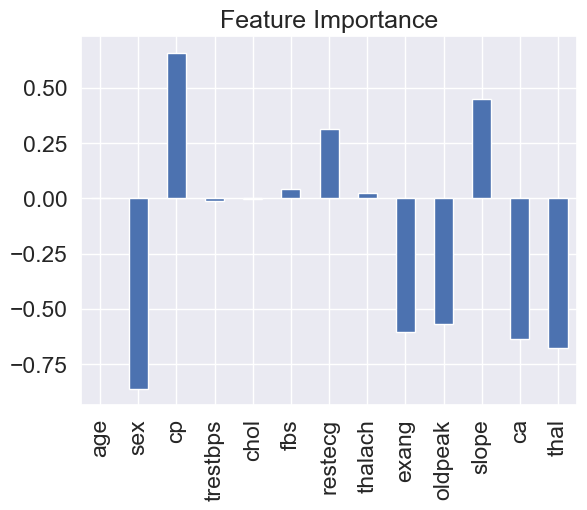

In [68]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False)

In [69]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation
If not hit evaluation metrics...

1. Can we collect more data?
2. Can we try different model? Like CatBoost or XGBoost?
3. Can we improve our current models? (beyond what we have done so far)
4. If your model is good enough (have you hit evaluation metric)

how would you export it and share it with others?
